In [206]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

In [207]:
# taken from the tutorial code provided by the assignment
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

In [208]:

# Create a kernel with a thicker line and a small break
def create_kernel(im_shape, line_thickness, break_size):
    kernel = np.ones(im_shape, dtype=np.uint8)
    
    # Define the center row and center column
    center_row = im_shape[0] // 2
    center_col = im_shape[1] // 2
    
    # Set the central part of the kernel to zero (thicker line)
    kernel[center_row - line_thickness // 2:center_row + line_thickness // 2 + 1, :] = 0

    # Set the break in the center of the line
    break_start = center_col - break_size // 2
    break_end = center_col + break_size // 2
    kernel[center_row, break_start:break_end + 1] = 1
    
    return kernel


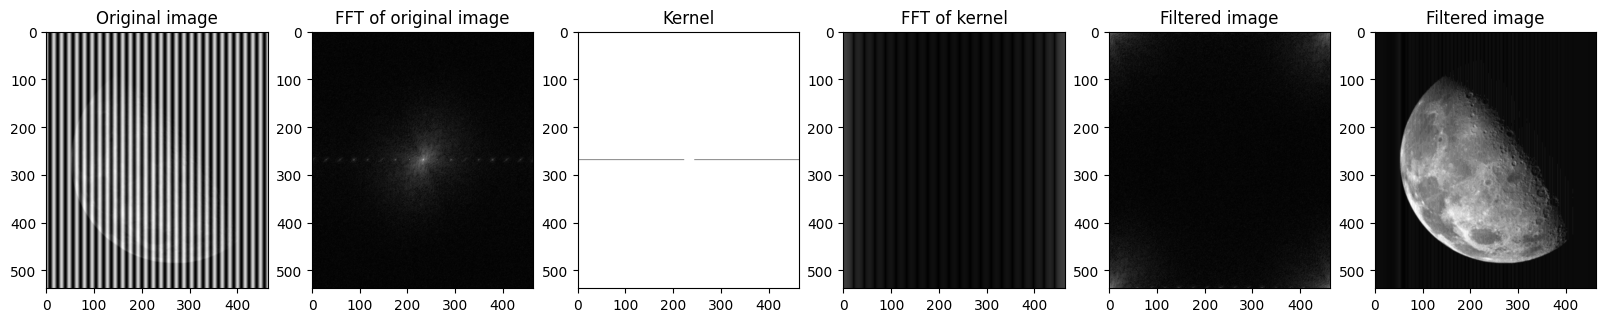

Saving image to: image_processed\moon_filtered.png


In [209]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    im_filtered = im

    # apply FFT to image
    im_fft = np.fft.fft2(im)

    # shift FFT to center
    im_fft = np.fft.fftshift(im_fft)

    # * this is the variable that you can change in order to get different results 
    # todo: play around with them to see if we can get a better result (currently the best values are thicc = 2 and break = 20)
    line_thickness = 2  
    break_size = 20

    # create kernel
    kernel = create_kernel(im.shape, line_thickness, break_size)

    # apply FFT to kernel
    fft_kernel = np.fft.fft2(kernel)

    # shift FFT to center
    # fft_kernel = np.fft.fftshift(fft_kernel)

    # apply filter
    im_filtered = np.multiply(im_fft, kernel)

    # return to original position
    im_filtered = np.fft.ifftshift(im_filtered)


    plt.figure(figsize=(20, 4))

    # plot original image
    plt.subplot(1, 6, 1)
    plt.title("Original image")
    plt.imshow(im, cmap="gray")

    # plot FFT of original image
    plt.subplot(1, 6, 2)
    plt.title("FFT of original image")
    plt.imshow(np.log(magnitude(im_fft) + 1), cmap="gray")

    # plot kernel
    plt.subplot(1, 6, 3)
    plt.title("Kernel")
    plt.imshow(np.log(magnitude(kernel) + 1), cmap="gray")

    # plot FFT of kernel
    plt.subplot(1, 6, 4)
    plt.title("FFT of kernel")
    plt.imshow(np.log(magnitude(fft_kernel) + 1), cmap="gray")

    plt.subplot(1, 6, 5)
    plt.title("Filtered image")
    plt.imshow(np.log(magnitude(im_filtered) + 1), cmap="gray")


    # apply inverse FFT
    im_filtered = np.fft.ifft2(im_filtered)

    # plot filtered image
    plt.subplot(1, 6, 6)  
    plt.title("Filtered image")
    plt.imshow(np.log(magnitude(im_filtered) + 1), cmap="gray")

    plt.show()

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))